In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<div style="text-align:center;">
  <span style="color: orange; font-size: 24px;">
    Required Capstone Project
  </span><br>
  <span style="color: orange; font-size: 24px;">
    Analysis Data on Credit Card Customers to Develop Machine Learning Models using Python
  </span><br>
  <span style="color: black; font-6ize: 12px;">
    LEE BOON CHEK
  </span>
</div>


# 1. Objective
The goal of this project is to develop machine learning models to predict if customers will default on their next credit card payment. 

# 2. About the Data

The CC_Default.csv dataset contains a total of 25 variables which are the following:

|Variable/Column Name|Description|
|--------------------|-----------|
|ID|A numerical value assigned to each credit card customer|
|LIMIT_BAL|The remaining credit a customer can use: LIMIT_BAL = (credit limit - used up amount)|
|SEX|A customer's sex assigned at birth: 1=male, 2=female|
|EDUCATION|A customer's educational attainment: <br>1=graduate school<br>2=university<br>3=high school<br>4=others<br>5=unknown<br>6=unknown|
|MARRIAGE|A customer's marital status:<br>0=unknown, 1=married, 2=single, 3=others|
|AGE|A customer's age in years|
|PAY_0|Repayment status in **September** 2005<br>0 or less = Paid duly, 1 or greater = the number indicates the number of months the payment was delayed|
|PAY_2|Repayment status in **August** 2005<br>0 or less = Paid duly, 1 or greater = the number indicates the number of months the payment was delayed|
|PAY_3|Repayment status in **July** 2005<br>0 or less = Paid duly, 1 or greater = the number indicates the number of months the payment was delayed|
|PAY_4|Repayment status in **June** 2005<br>0 or less = Paid duly, 1 or greater = the number indicates the number of months the payment was delayed|
|PAY_5|Repayment status in **May** 2005<br>0 or less = Paid duly, 1 or greater = the number indicates the number of months the payment was delayed|
|PAY_6|Repayment status in **April** 2005<br>0 or less = Paid duly, 1 or greater = the number indicates the number of months the payment was delayed|
|BILL_AMT1|The amount in the bill statement for **September** 2005 in NT dollar|
|BILL_AMT1|The amount in the bill statement for **August** 2005 in NT dollar|
|BILL_AMT1|The amount in the bill statement for **July** 2005 in NT dollar|
|BILL_AMT1|The amount in the bill statement for **June** 2005 in NT dollar|
|BILL_AMT1|The amount in the bill statement for **May** 2005 in NT dollar|
|BILL_AMT1|The amount in the bill statement for **April** 2005 in NT dollar|
|PAY_AMT1|The amount paid in NT dollar in **September** 2005|
|PAY_AMT2|The amount paid in NT dollar in **August** 2005|
|PAY_AMT3|The amount paid in NT dollar in **July** 2005|
|PAY_AMT4|The amount paid in NT dollar in **June** 2005|
|PAY_AMT5|The amount paid in NT dollar in **May** 2005|
|PAY_AMT6|The amount paid in NT dollar in **April** 2005|
|<font color='red'>default.payment.next.month<br>**(Target Variable)**|Shows customers who defaulted on their payments in the following month:<br>1 = Yes<br>2 = No

**Source**: Lichman, M. (2013). UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients. Irvine, CA: University of California, School of Information and Computer Science.

# 3. Task 1
### Task 1.1 and Task 1.2: Import, describe and manipulate data

In [2]:
#Load dataset into a DataFrame
df_raw = pd.read_csv("CC_Default.csv")

#Create a backup copy of the DataFrame
df_backup = df_raw.copy()

#Show overview of the dataset
df_raw.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [3]:
# Check data type and shape
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<font color='blue'>There are total 30000 records (rows), 25 variables (columns). All variables are in numerical format (integer or float).

In [4]:
#Check any missing value
df_raw.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<font color = 'blue'>There is no missing value.

In [5]:
#Check dataset statistics
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


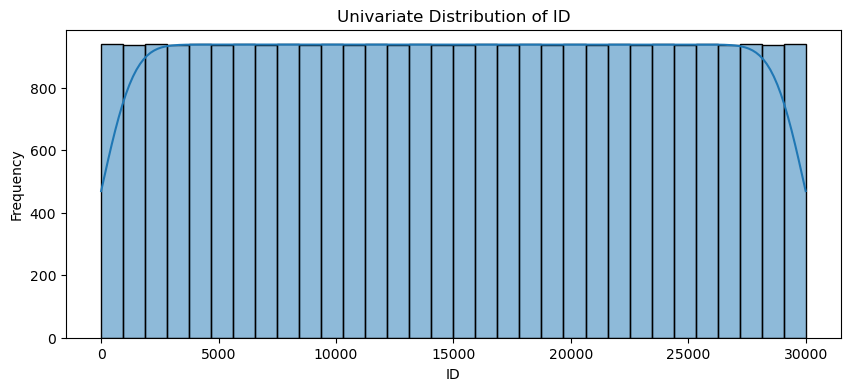

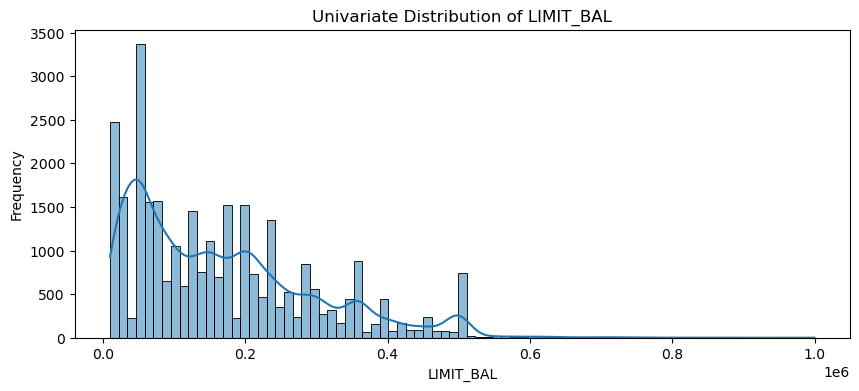

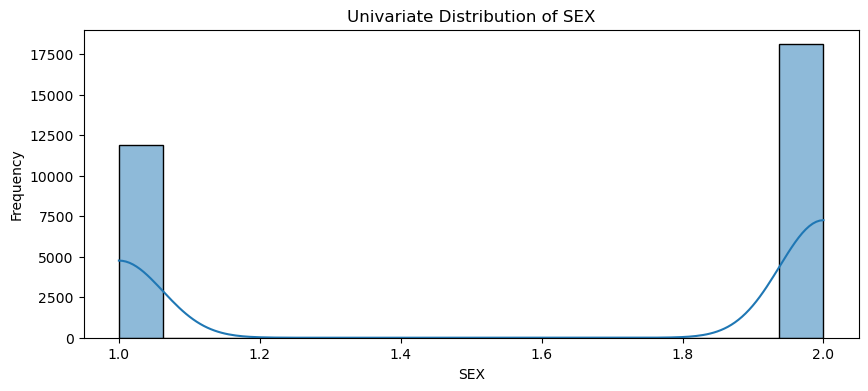

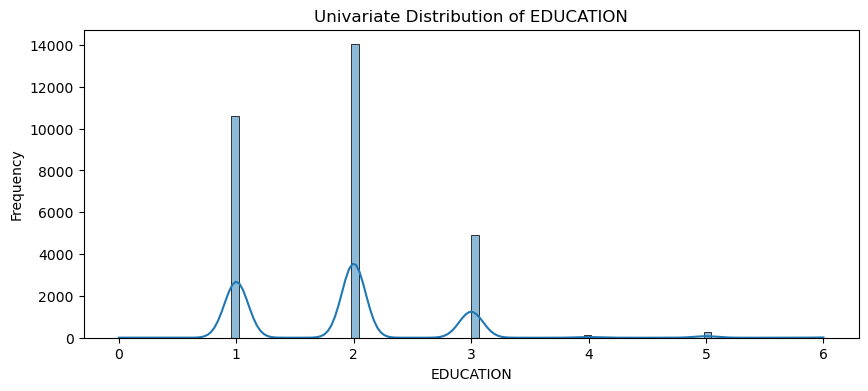

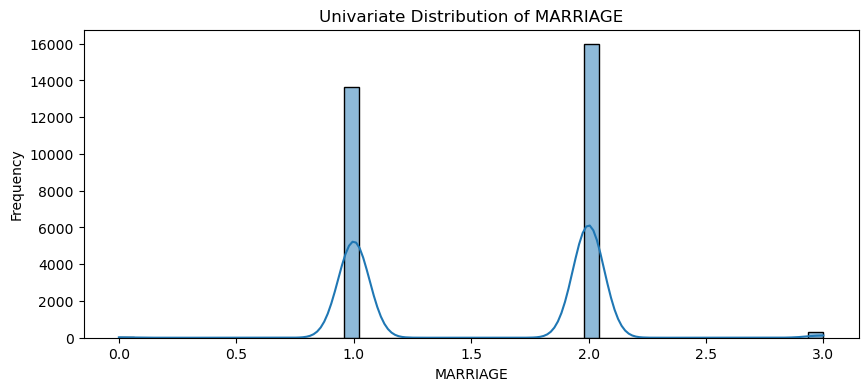

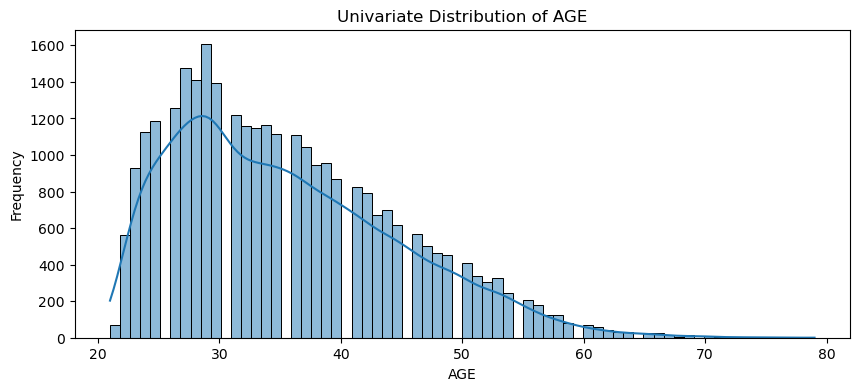

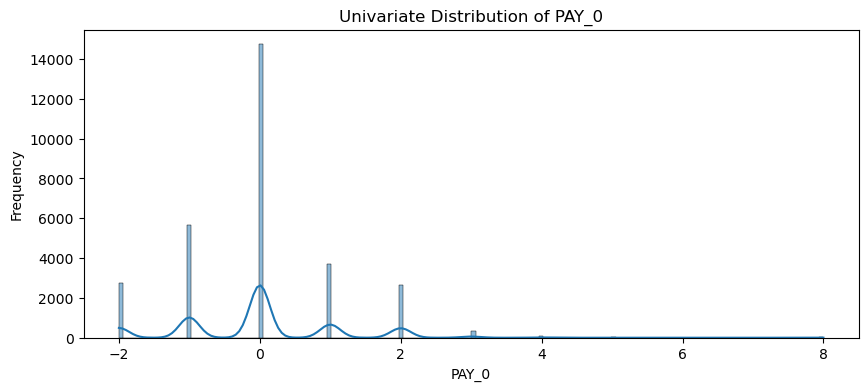

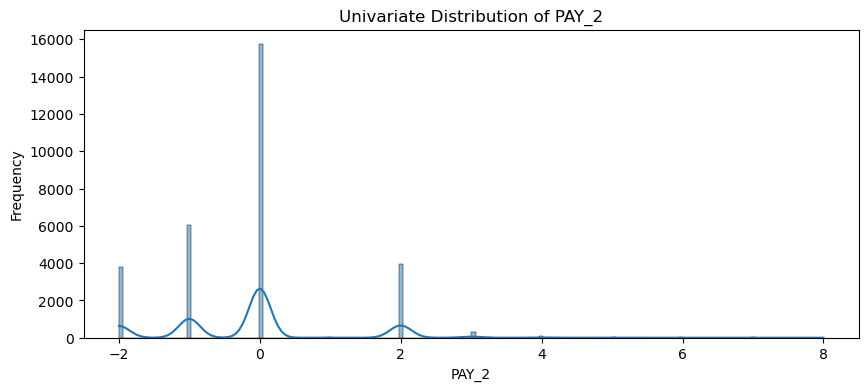

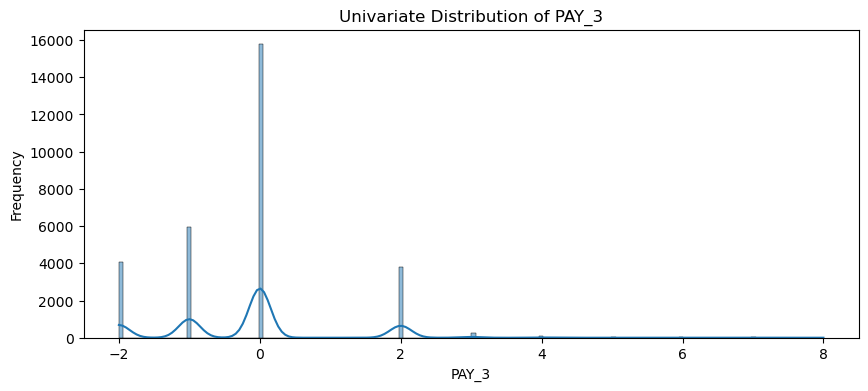

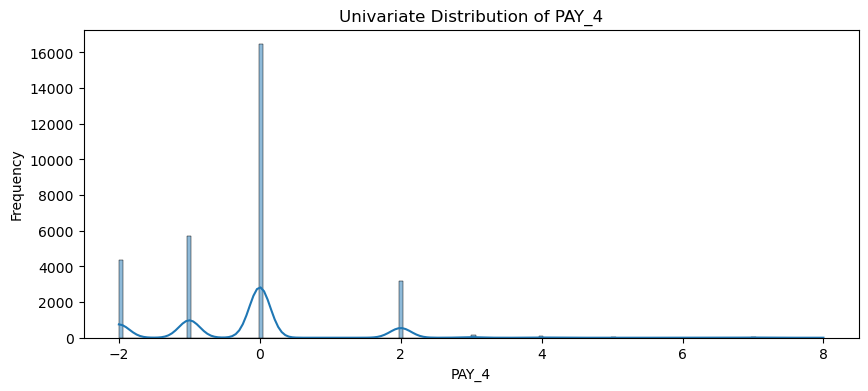

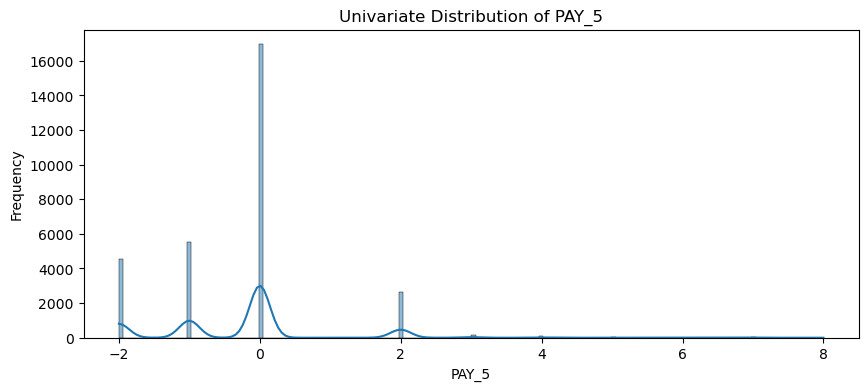

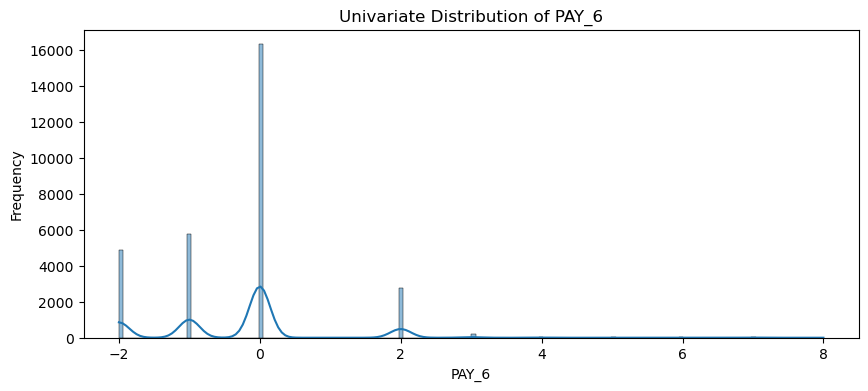

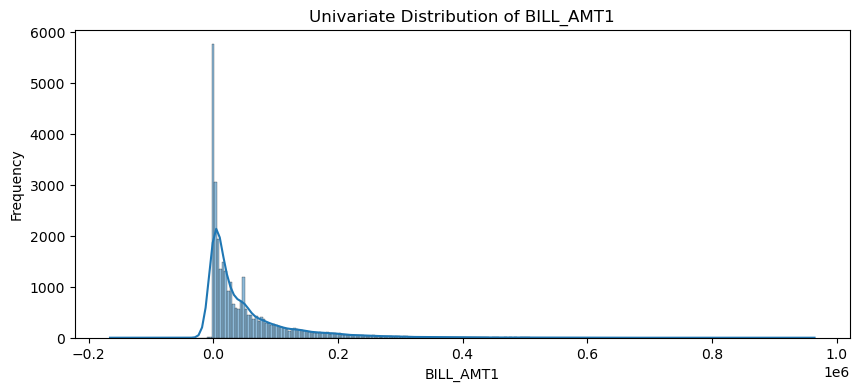

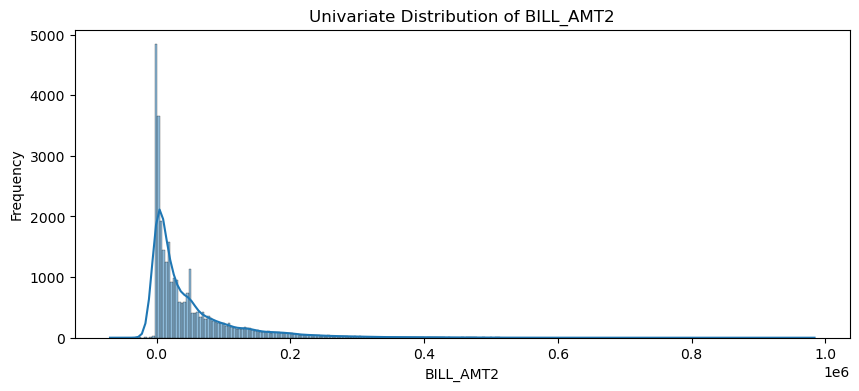

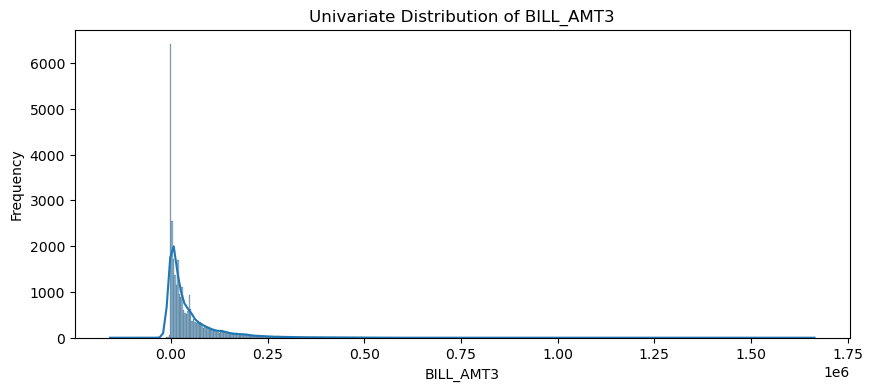

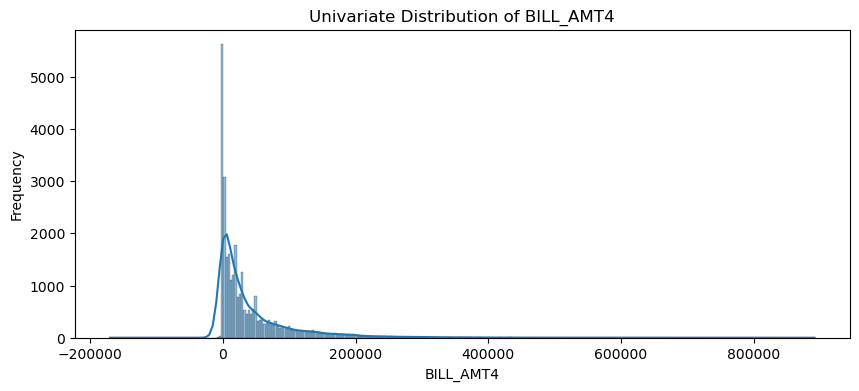

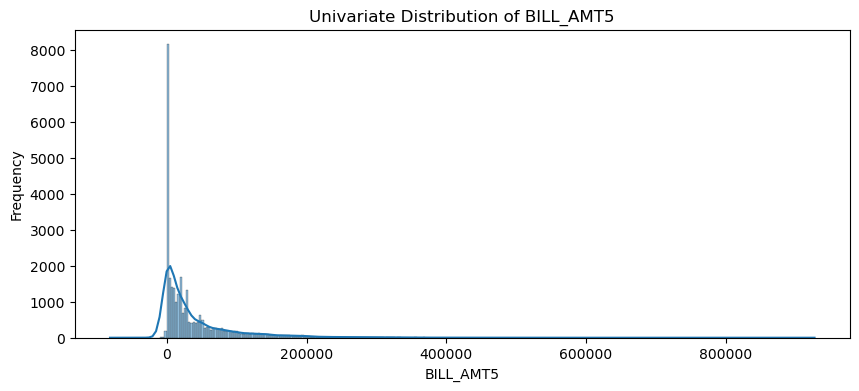

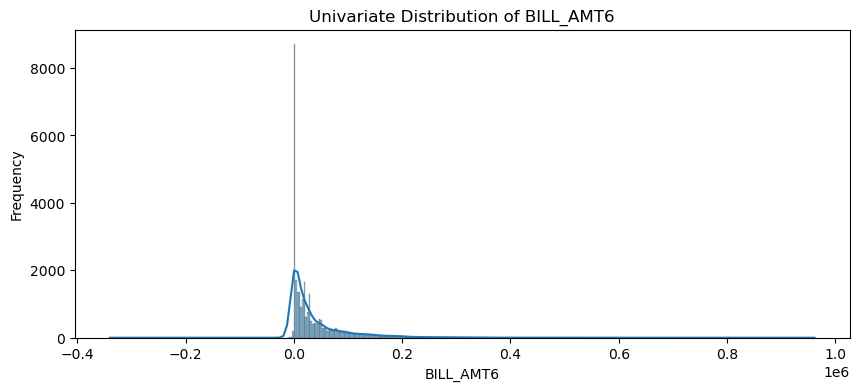

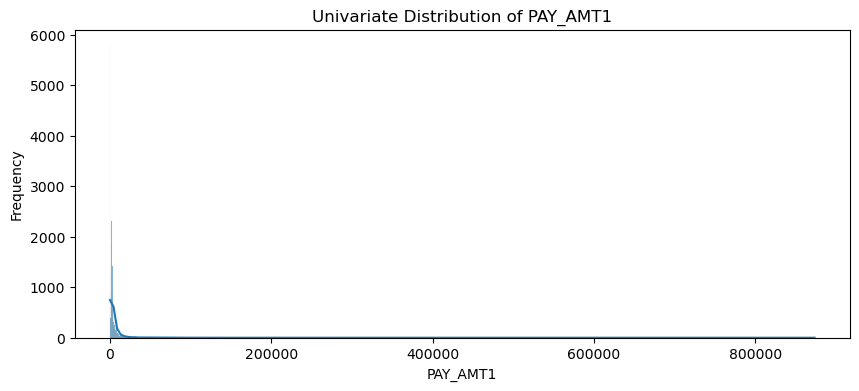

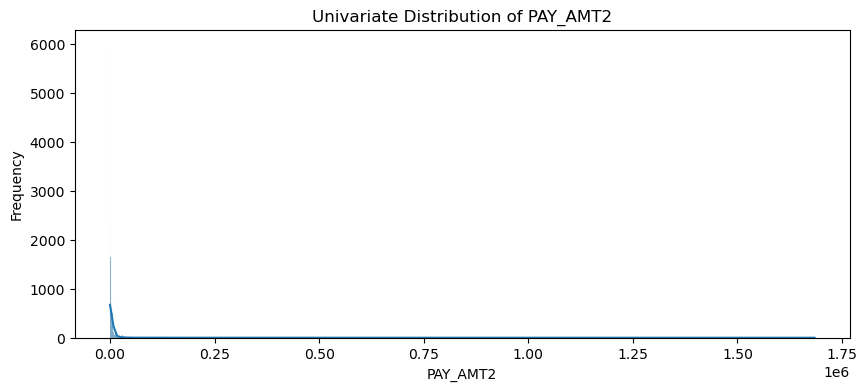

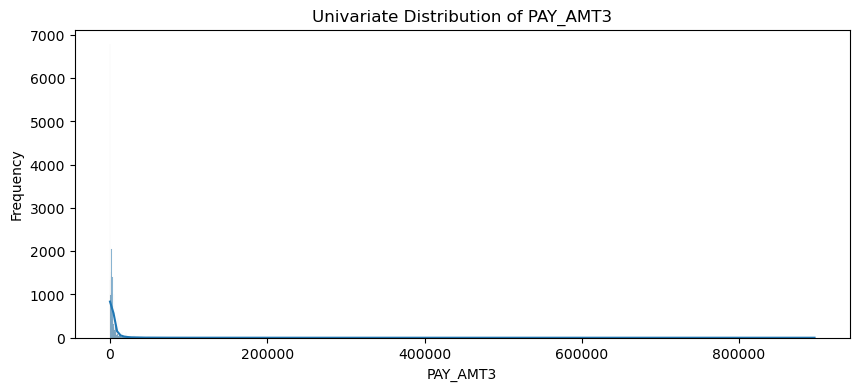

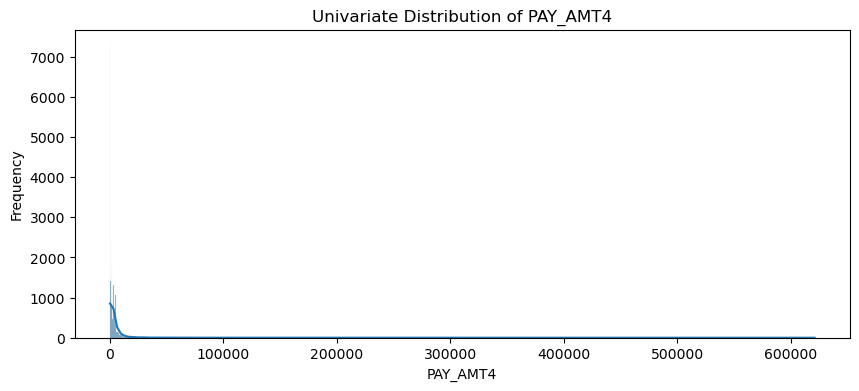

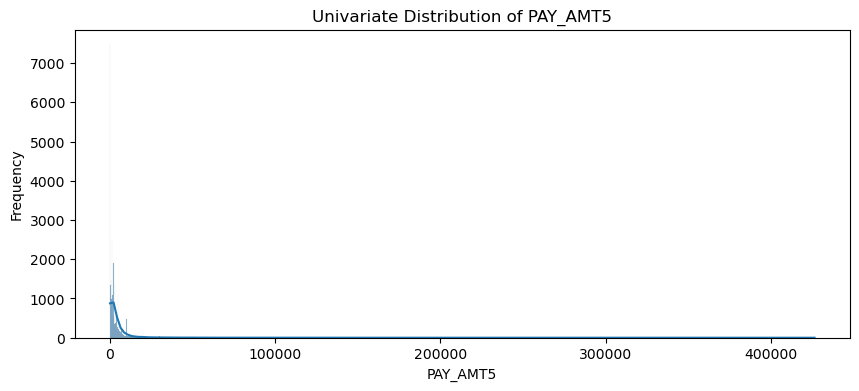

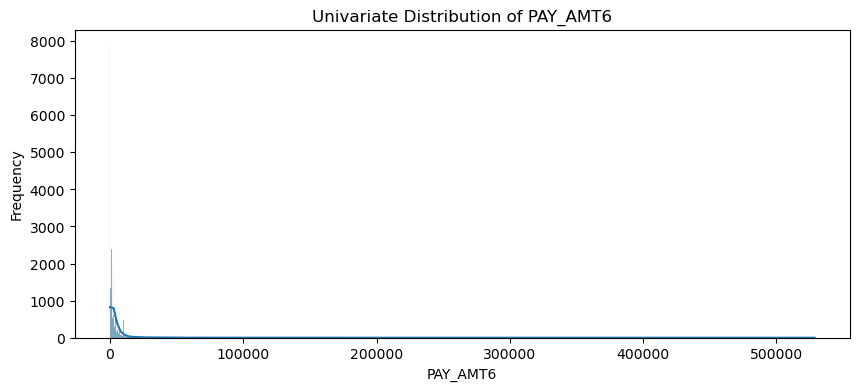

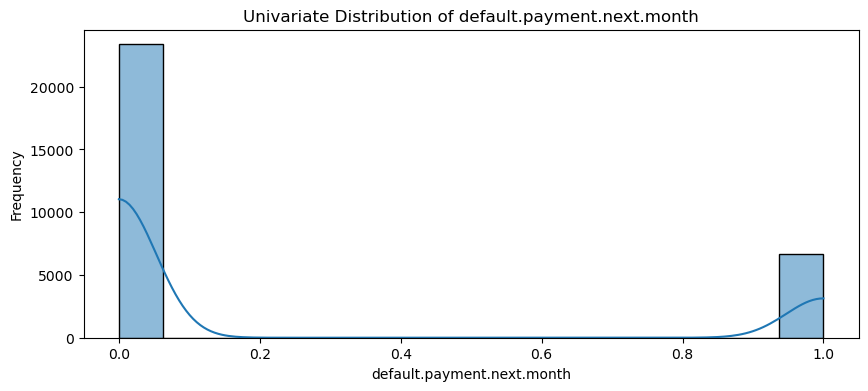

In [6]:
#Check univariate distribution
for col in df_raw.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_raw[col], kde=True)
    plt.title(f'Univariate Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Task 1.3 and Task 1.4: Create visualizations to see the correlations among data and interpret the visualizations

In [7]:
#First we look at repayment status from April to September 2005
df_pay = df_raw.iloc[:,6:12]
df_pay.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


<font color = 'blue'> The repayment status records from the dataset is not logical. It is not possible for someone who has made payment on time (0 and below) turns to have 2 months payment delayed (2) in the following month (as shown in index 1). This indicates the data might be inaccurate or might have been adjusted. 

<font color = 'blue'> Hence we will change the repayment status to two catogories only: 0 = Duly paid, 1 = Delayed to ignore these illogical inputs. Then we will further transform the data by summing the 6 months. This gives information of how many months the customer has delayed payment out of the 6 months period, which is more useful in constructing model.

In [8]:
#Replace 0 and less as 0; and 1 or more as 1
df_raw.iloc[:,6:12] = df_raw.iloc[:,6:12].map(lambda x: 1 if x > 0 else 0)

In [9]:
df_pay = df_raw.iloc[:,6:12]
df_pay.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,1,0,0,0,0
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [10]:
#Add new column Total Months of Delayed
df_raw['PAY_AGG'] = df_raw.iloc[:,6:12].sum(axis=1)

In [11]:
#Check new feature values
df_raw.iloc[:5,np.r_[6:12,25]]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AGG
0,1,1,0,0,0,0,2
1,0,1,0,0,0,1,2
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


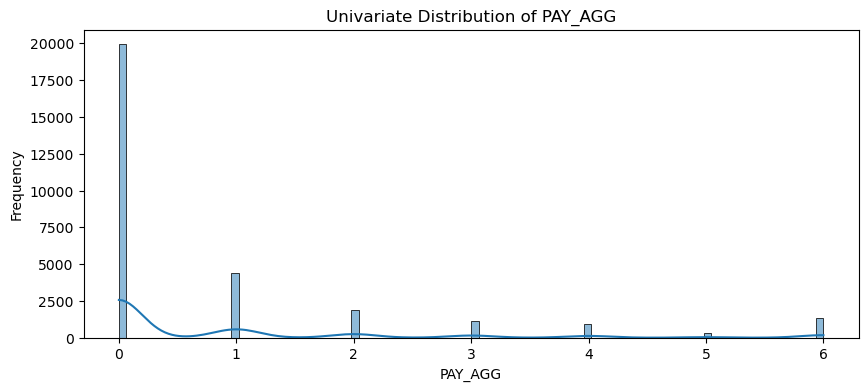

In [12]:
#Check new feature distribution
plt.figure(figsize=(10, 4))
sns.histplot(df_raw['PAY_AGG'], kde=True)
plt.title('Univariate Distribution of PAY_AGG')
plt.xlabel('PAY_AGG')
plt.ylabel('Frequency')
plt.show()

<font color = 'blue'> We can see that number decreases as the number of months that the payment status is delayed decreases except for those customers that has delayed payment for all 6 months in record. Most likely these are the customers (6 months) that have difficulty making any payment in near term.

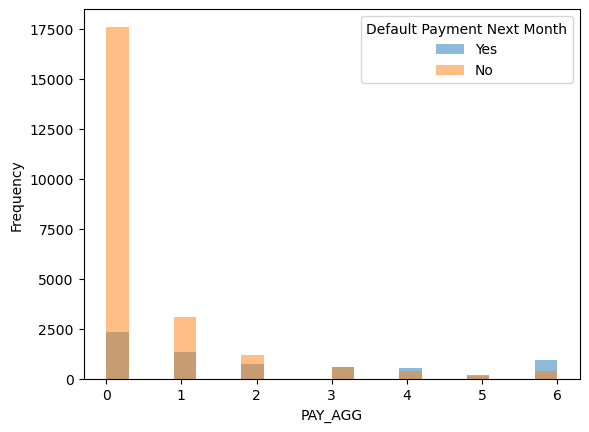

In [13]:
for category in df_raw['default.payment.next.month'].unique():
    plt.hist(df_raw[df_raw['default.payment.next.month'] == category]['PAY_AGG'], label=str(category), alpha=0.5, bins=20)
plt.legend(['Yes','No'], title='Default Payment Next Month')
plt.xlabel('PAY_AGG')
plt.ylabel('Frequency')
plt.show()

In [14]:
grouped = df_raw.groupby(['PAY_AGG', 'default.payment.next.month']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0 for each 'PAY_AGG' category
grouped['ratio'] = grouped[1] / grouped[0]

grouped

default.payment.next.month,0,1,ratio
PAY_AGG,,,
0,17597,2334,0.132636
1,3106,1320,0.424984
2,1163,736,0.632846
3,567,587,1.035273
4,406,545,1.342365
5,127,171,1.346457
6,398,943,2.369347


In [15]:
grouped = grouped.reset_index()

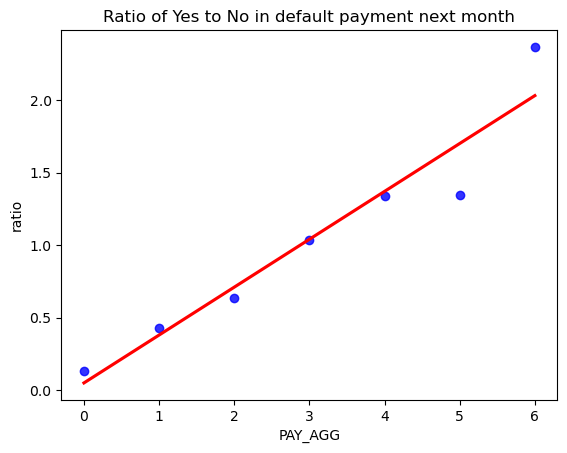

In [16]:
sns.regplot(x='PAY_AGG', y='ratio', data=grouped, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('PAY_AGG')
plt.title('Ratio of Yes to No in default payment next month')
plt.show()

<font color = 'blue'>As the number of months the customer has delayed payment increases, the number of customer that default payment next month compared to no default payment increases.

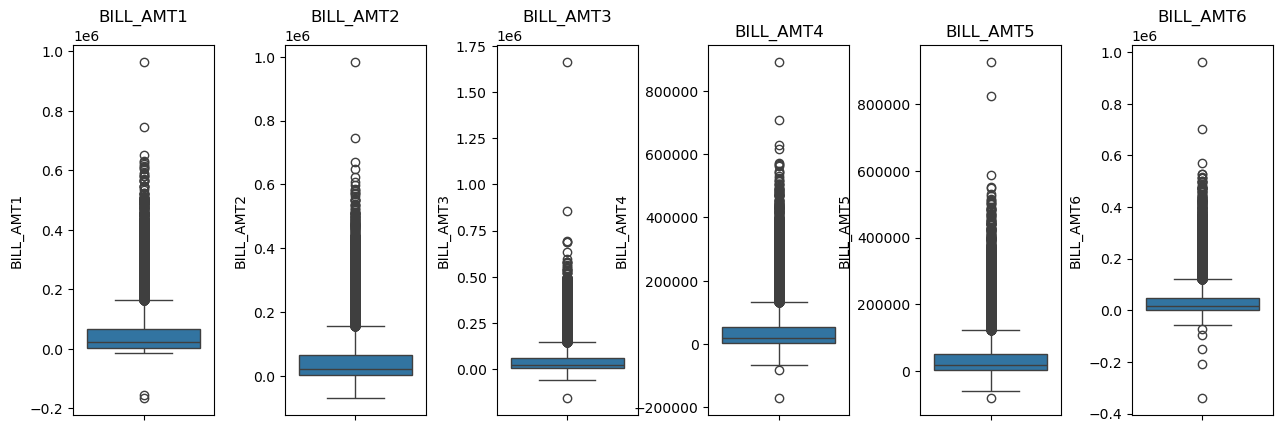

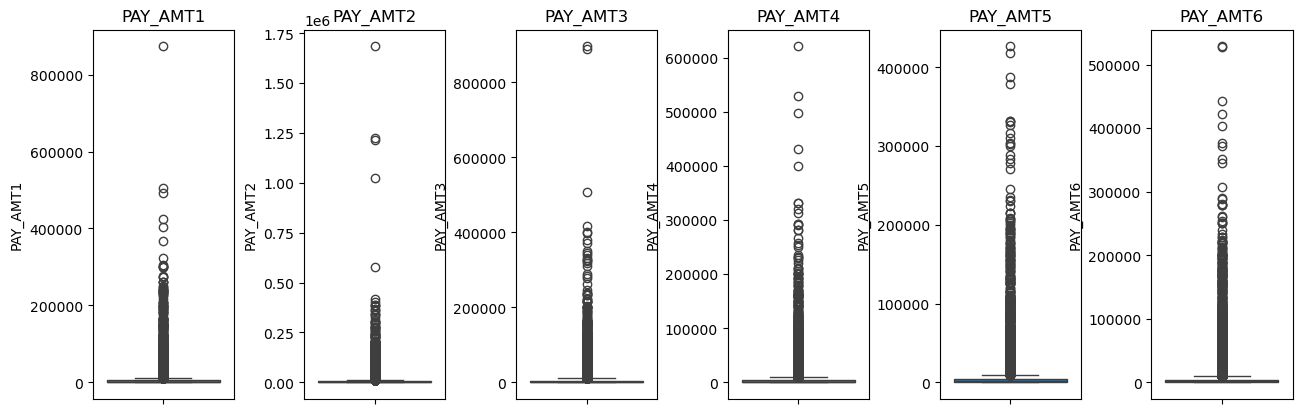

In [17]:
#Next we look at Bill Statement and Amount Paid from April to September 2005
i=1
for col in df_raw.columns[12:18]:
    plt.subplot(1,6,i)
    sns.boxplot(data=df_raw[col])
    plt.title(col)
    i+=1
plt.subplots_adjust(right=2,wspace=0.5)
plt.show()
j=1
for col in df_raw.columns[18:24]:
    plt.subplot(1,6,j)
    sns.boxplot(data=df_raw[col])
    plt.title(col)
    j+=1
plt.subplots_adjust(right=2,wspace=0.5)
plt.show()

<font color = 'blue'> We can see that the data is very much skewed to the high amount so we will categorize the data for better distribution profile.

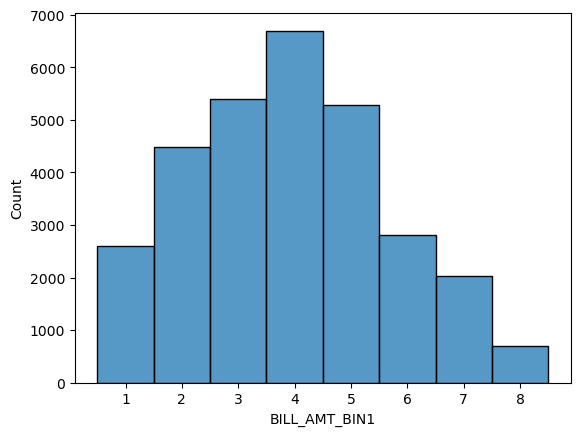

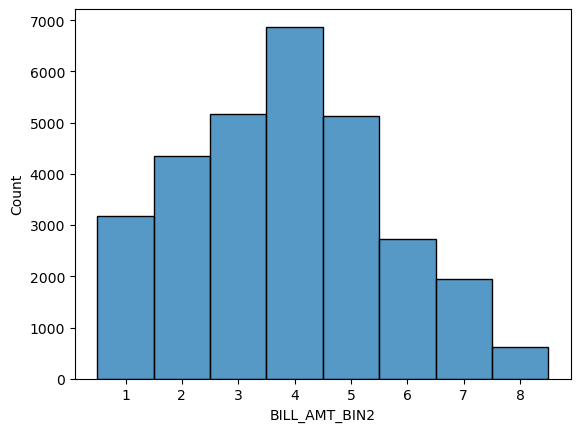

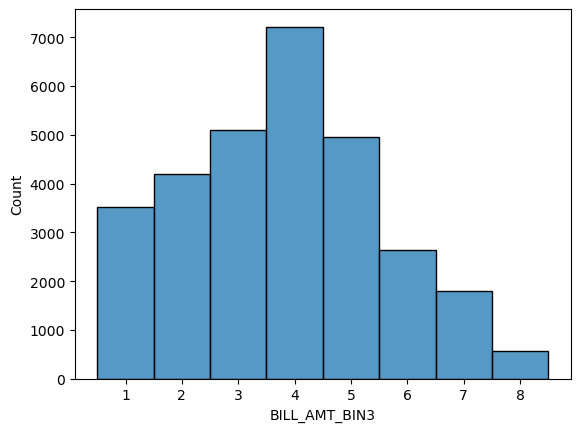

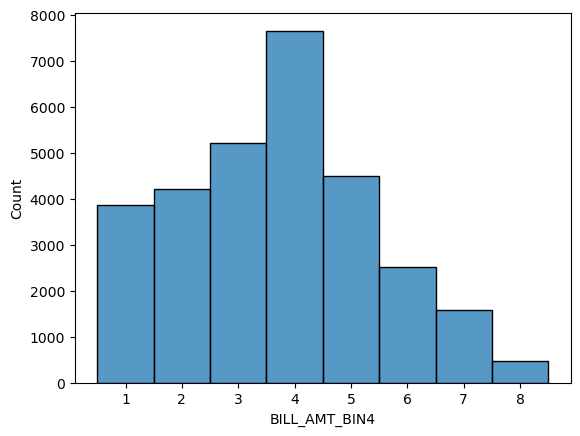

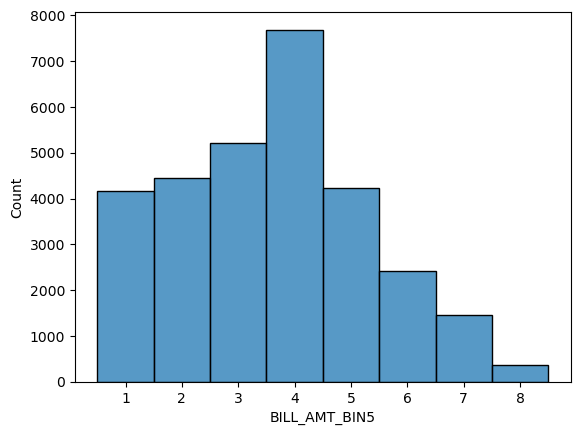

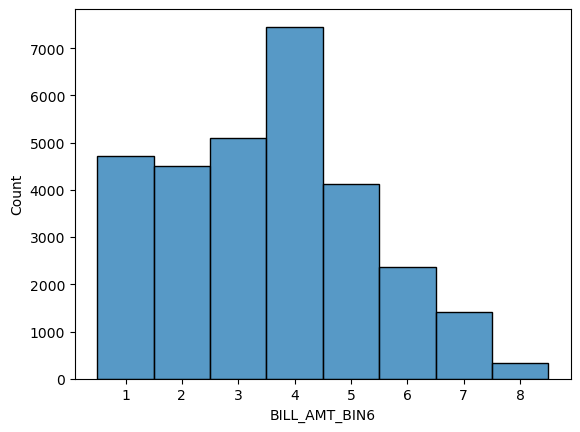

In [18]:
bins = [-400000,0, 3000, 15000, 45000, 90000, 150000, 270000, 1800000]
labels = ['1','2','3','4','5','6','7','8']
new_columns =['BILL_AMT_BIN1','BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6']

for col, new_col in zip(df_raw.columns[12:18], new_columns):
    df_raw[new_col]=pd.cut(df_raw[col], bins = bins, labels = labels)
    plt.figure()
    sns.histplot(df_raw[new_col],discrete=True)

plt.show()

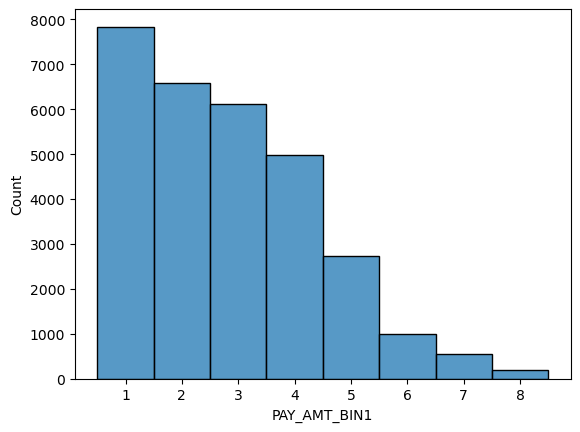

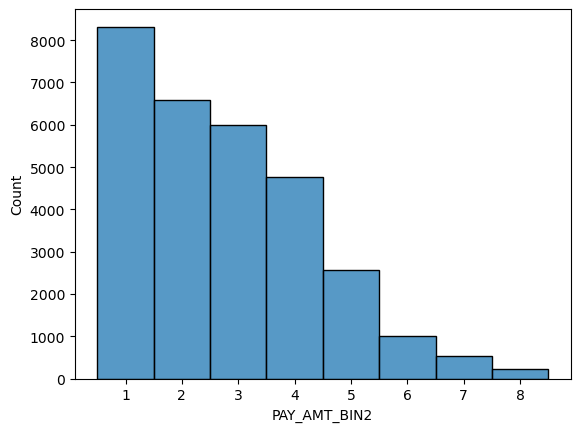

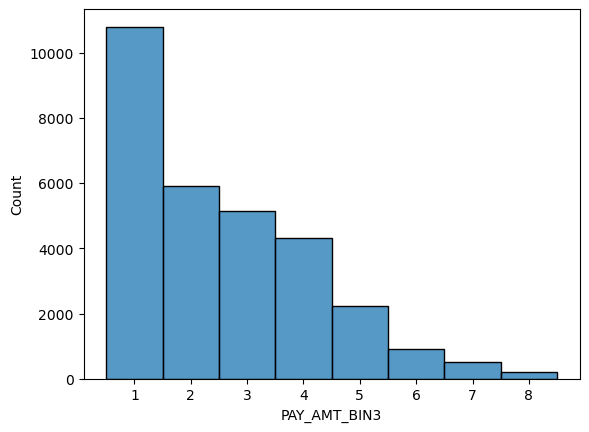

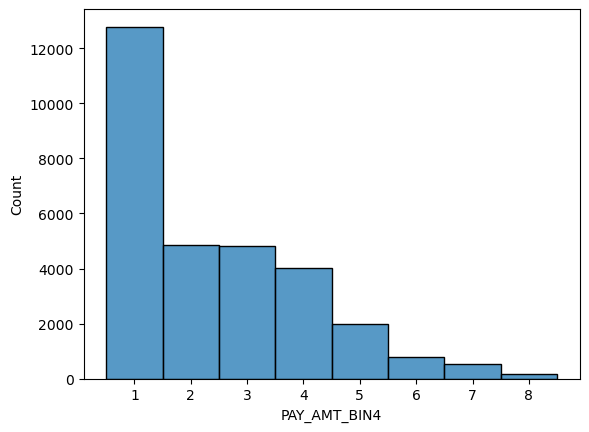

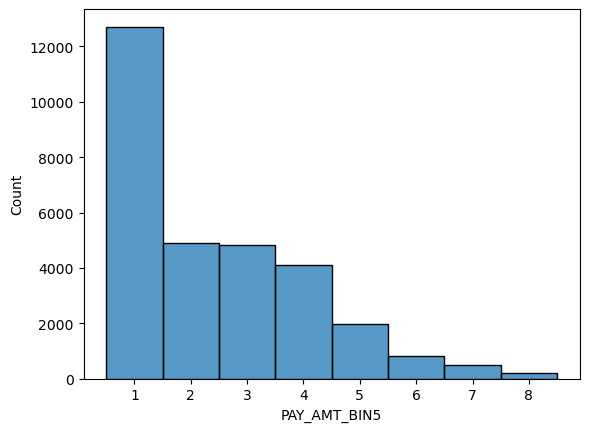

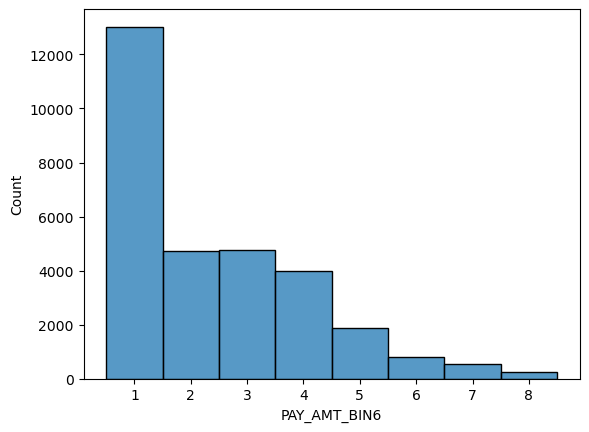

In [19]:
bins = [-1,1000,2000,4000,8000,16000,32000,90000,1800000]
labels = ['1','2','3','4','5','6','7','8']
new_columns =['PAY_AMT_BIN1','PAY_AMT_BIN2','PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6']

for col, new_col in zip(df_raw.columns[18:24], new_columns):
    df_raw[new_col]=pd.cut(df_raw[col], bins = bins, labels = labels)
    plt.figure()
    sns.histplot(df_raw[new_col],discrete=True)

plt.show()

<font color = 'blue'>BILL_AMT are grouped as below:<br>

|BILL_AMT|Group|
|--------|-----|
|-40000 to 0|1|
|0 to 3000|2|
|3000 to 15000|3|
|15000 to 45000|4|
|45000 to 90000|5|
|90000 to 150000|6|
|150000 to 270000|7|
|270000 to 1800000|8|<br>

<font color = 'blue'>PAY_AMT are grouped as below:<br>
        
|BILL_AMT|Group|
|--------|-----|
|0 to 1000 |1|
|1000 to 2000|2|
|2000 to 4000|3|
|4000 to 8000|4|
|8000 to 16000|5|
|16000 to 32000|6|
|32000 to 90000|7|
|90000 to 1800000|8|    

<font color ='blue'> We can observe that the amount in the bill statement for every month has same distribution. <br>
<font color ='blue'> Whereas the distribution of amount paid in Sept, Aug, Jul is different from Jun, May, Apr, showing customers tend to make smaller payment in Jun, May, Apr. This could be due to Jun, May, Apr are holiday and shopping season, and customers have less cash to make payment. This observation is further supported by higher mean and median amount in the bill statement in Jun, May, and Apr as customers are spending more.

In [20]:
#Converting categorical datatype to numeric
df_raw = df_raw.apply(lambda x: pd.to_numeric(x, errors = 'ignore') if x.dtype.name == 'category' else x)

<Font color = 'blue'>Categorical datatype is converted to numerical because model can better handle the numerical datatype.

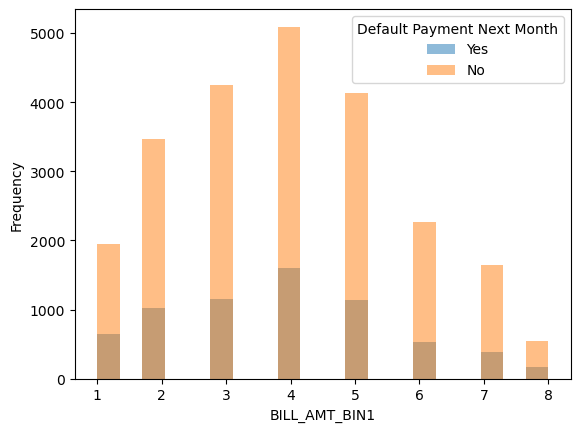

In [21]:
#Check relation of Amount in the Bill Statement to Default Payment Next Month in September 2005
for category in df_raw['default.payment.next.month'].unique():
    plt.hist(df_raw[df_raw['default.payment.next.month'] == category]['BILL_AMT_BIN1'], label=str(category), alpha=0.5, bins=20)
plt.legend(['Yes','No'], title='Default Payment Next Month')
plt.xlabel('BILL_AMT_BIN1')
plt.ylabel('Frequency')
plt.show()

In [22]:
grouped = df_raw.groupby(['BILL_AMT_BIN1', 'default.payment.next.month']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0 for each 'PAY_AGG' category
grouped['ratio'] = grouped[1] / grouped[0]

grouped

default.payment.next.month,0,1,ratio
BILL_AMT_BIN1,,,
1,1955,643,0.328900
2,3470,1018,0.293372
3,4253,1148,0.269927
4,5092,1605,0.315200
5,4136,1140,0.275629
6,2269,532,0.234465
7,1650,385,0.233333
8,539,165,0.306122


In [23]:
grouped = grouped.reset_index()

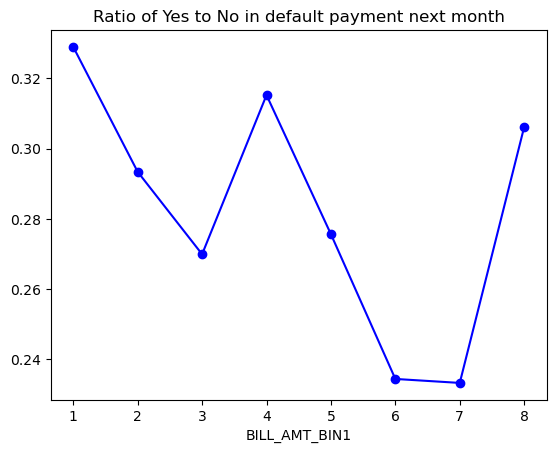

In [24]:
plt.plot(grouped['BILL_AMT_BIN1'],grouped['ratio'],'bo-')
plt.xlabel('BILL_AMT_BIN1')
plt.title('Ratio of Yes to No in default payment next month')
plt.show()

<font color = 'blue'>No linear relationship is found between Amount to the statement to default payment next month.

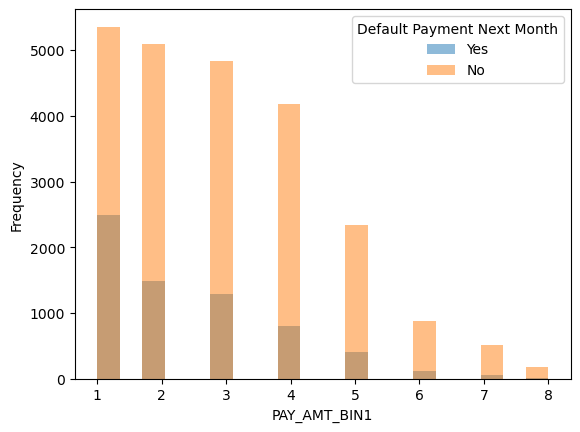

In [25]:
#Check relation of Amount Paid to Default Payment Next Month in September 2005
for category in df_raw['default.payment.next.month'].unique():
    plt.hist(df_raw[df_raw['default.payment.next.month'] == category]['PAY_AMT_BIN1'], label=str(category), alpha=0.5, bins=20)
plt.legend(['Yes','No'], title='Default Payment Next Month')
plt.xlabel('PAY_AMT_BIN1')
plt.ylabel('Frequency')
plt.show()

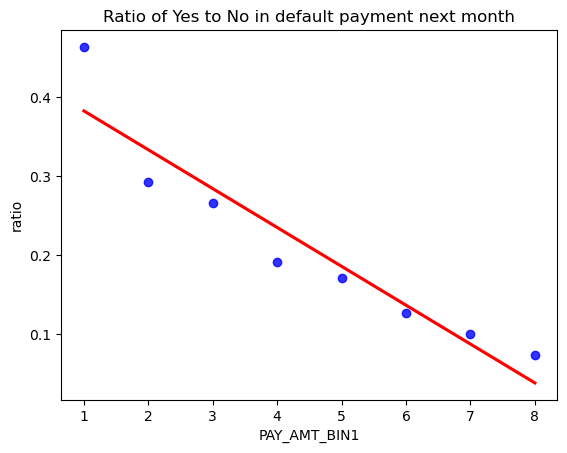

In [26]:
grouped = df_raw.groupby(['PAY_AMT_BIN1', 'default.payment.next.month']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0 for each 'PAY_AGG' category
grouped['ratio'] = grouped[1] / grouped[0]

grouped = grouped.reset_index()

sns.regplot(x='PAY_AMT_BIN1', y='ratio', data=grouped, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('PAY_AMT_BIN1')
plt.title('Ratio of Yes to No in default payment next month')
plt.show()

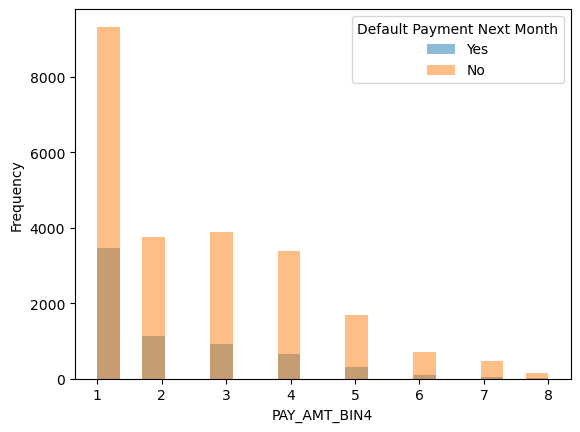

In [27]:
#Check relation of Amount Paid to Default Payment Next Month in Jun 2005
for category in df_raw['default.payment.next.month'].unique():
    plt.hist(df_raw[df_raw['default.payment.next.month'] == category]['PAY_AMT_BIN4'], label=str(category), alpha=0.5, bins=20)
plt.legend(['Yes','No'], title='Default Payment Next Month')
plt.xlabel('PAY_AMT_BIN4')
plt.ylabel('Frequency')
plt.show()

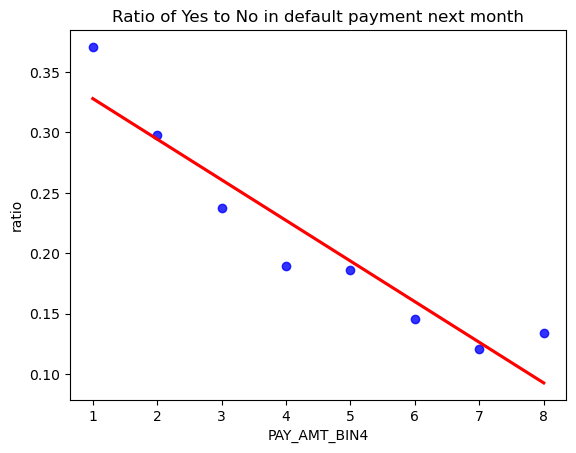

In [28]:
grouped = df_raw.groupby(['PAY_AMT_BIN4', 'default.payment.next.month']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0 for each 'PAY_AGG' category
grouped['ratio'] = grouped[1] / grouped[0]

grouped = grouped.reset_index()

sns.regplot(x='PAY_AMT_BIN4', y='ratio', data=grouped, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('PAY_AMT_BIN4')
plt.title('Ratio of Yes to No in default payment next month')
plt.show()

<font color ='blue'> Customers tend to default payment in next month when they make smaller payment.

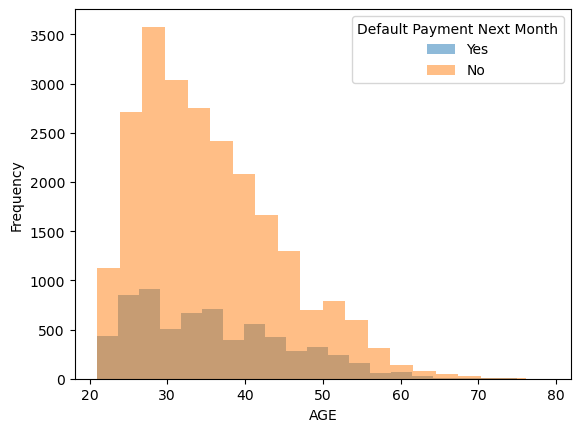

In [29]:
#Check relation of Age to Default Payment Next Month
for category in df_raw['default.payment.next.month'].unique():
    plt.hist(df_raw[df_raw['default.payment.next.month'] == category]['AGE'], label=str(category), alpha=0.5, bins=20)
plt.legend(['Yes','No'], title='Default Payment Next Month')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

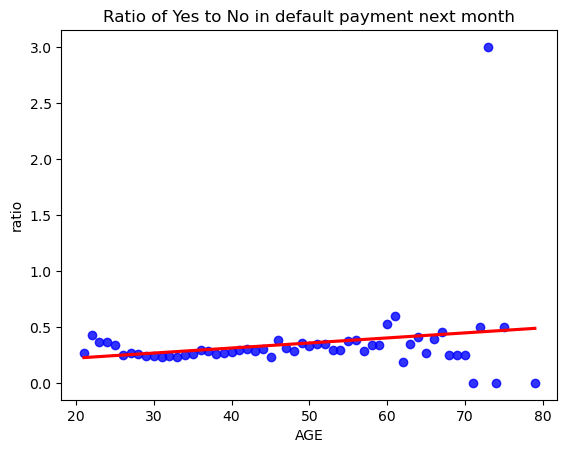

In [30]:
grouped = df_raw.groupby(['AGE', 'default.payment.next.month']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0 for each 'PAY_AGG' category
grouped['ratio'] = grouped[1] / grouped[0]

grouped = grouped.reset_index()

sns.regplot(x='AGE', y='ratio', data=grouped, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('AGE')
plt.title('Ratio of Yes to No in default payment next month')
plt.show()

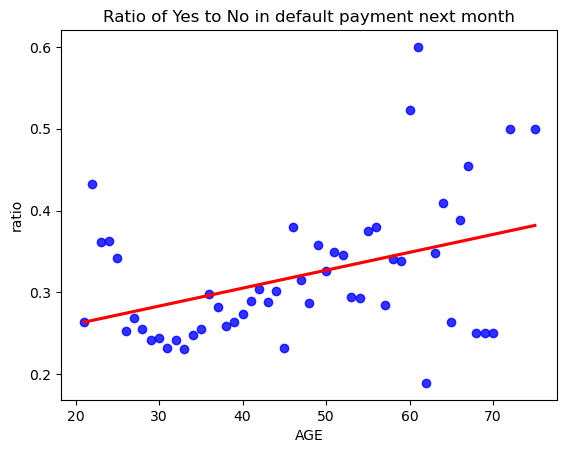

In [31]:
grouped = grouped[grouped['ratio']<2.5]
grouped = grouped[grouped['ratio']!=0]
sns.regplot(x='AGE', y='ratio', data=grouped, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('AGE')
plt.title('Ratio of Yes to No in default payment next month')
plt.show()


<font color = 'blue'>Generally customers tend to default next month payment when they are less than 30 years old and when their age increases.

In [32]:
#Next we look at categorical variables
df_raw['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [33]:
# 5 and 6 in Education are both unknown, and 0 has no information, therefore we will combine them as one category
df_raw['EDUCATION'] = df_raw['EDUCATION'].replace([6,0],5)
df_raw['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      345
4      123
Name: count, dtype: int64

In [34]:
df_raw['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [35]:
df_raw['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [36]:
#Since unknown has no information useful for building model, and their number is small, we will remove unknown from categorical features
df_raw = df_raw[df_raw['EDUCATION']!=5]
df_raw = df_raw[df_raw['MARRIAGE']!=0]
print(df_raw['EDUCATION'].value_counts())
print(df_raw['MARRIAGE'].value_counts())

EDUCATION
2    14024
1    10581
3     4873
4      123
Name: count, dtype: int64
MARRIAGE
2    15806
1    13477
3      318
Name: count, dtype: int64


In [37]:
print(f"Remaining number of records is {df_raw.shape[0]} rows")

Remaining number of records is 29601 rows


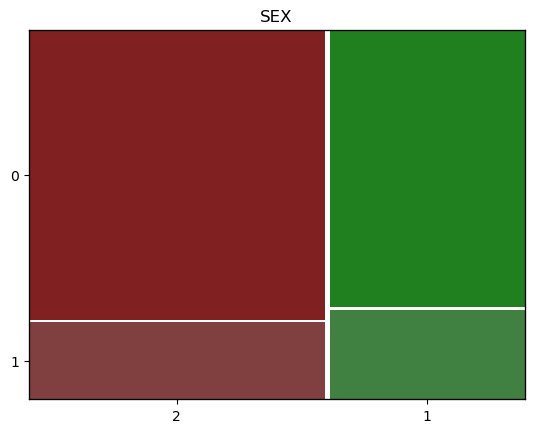

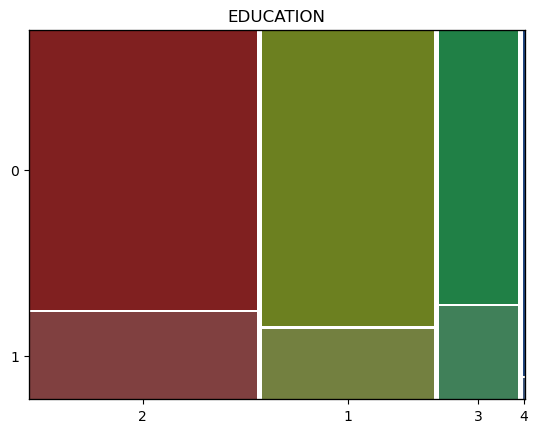

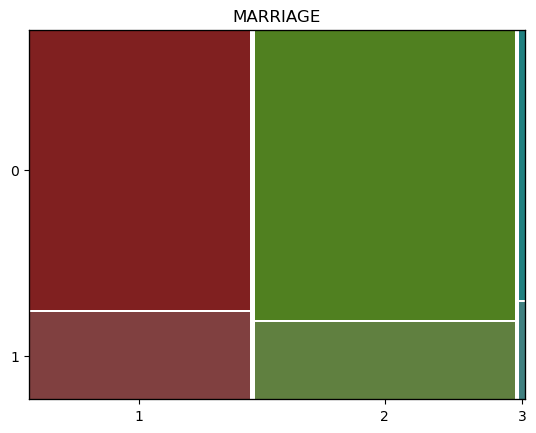

In [38]:
from statsmodels.graphics.mosaicplot import mosaic
cat_cols = ['SEX','EDUCATION','MARRIAGE']
for cat_col in cat_cols:
    mosaic(df_raw,[cat_col,'default.payment.next.month'],title=cat_col, labelizer=lambda _:"",gap=0.01)
plt.show()

<font color ='blue'>From mosaic graph, we can see that different group of the category has different rate of customers default payment.

<font color ='blue'>More male default payment compared to female. Customers having education of others is least likely to default payment, followed by graduate school, university, and lastly high school. Customers that are single are less likely default payment compared to married and others.

In [39]:
from scipy.stats import chi2_contingency

results_df = pd.DataFrame(columns=['Feature','P-value','There is significant association'])

for cat_col in cat_cols:
    cat_table = pd.crosstab(df_raw[cat_col], df_raw['default.payment.next.month'])
    # Perform the chi-square test for Feature1
    chi2_stat, p_value, dof, expected = chi2_contingency(cat_table)
    if p_value > 0.05:
        conclusion = 'no'
    else:
        conclusion = 'yes'
    results_df = pd.concat([results_df,pd.DataFrame({'Feature':[cat_col],'P-value':[p_value],'There is significant association':[conclusion]})],ignore_index=True)
display(results_df)

,Feature,P-value,There is significant association
0,SEX,8.151209e-12,yes
1,EDUCATION,1.454155e-25,yes
2,MARRIAGE,1.127557e-07,yes


<font color = 'blue'>Using statistical chi-square test also confirms these categorical features are correlated to target variable.

In [40]:
#Check DataFrame columns
df_raw.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PAY_AGG', 'BILL_AMT_BIN1',
       'BILL_AMT_BIN2', 'BILL_AMT_BIN3', 'BILL_AMT_BIN4', 'BILL_AMT_BIN5',
       'BILL_AMT_BIN6', 'PAY_AMT_BIN1', 'PAY_AMT_BIN2', 'PAY_AMT_BIN3',
       'PAY_AMT_BIN4', 'PAY_AMT_BIN5', 'PAY_AMT_BIN6'],
      dtype='object')

In [41]:
#Drops columns that are not relevant
df_raw = df_raw.drop(
    ['ID','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)

In [42]:
df_raw

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month,PAY_AGG,BILL_AMT_BIN1,BILL_AMT_BIN2,BILL_AMT_BIN3,BILL_AMT_BIN4,BILL_AMT_BIN5,BILL_AMT_BIN6,PAY_AMT_BIN1,PAY_AMT_BIN2,PAY_AMT_BIN3,PAY_AMT_BIN4,PAY_AMT_BIN5,PAY_AMT_BIN6
0,20000.0,2,2,1,24,1,2,3,3,2,1,1,1,1,1,1,1,1,1
1,120000.0,2,2,2,26,1,2,2,2,2,3,3,3,1,1,1,1,1,2
2,90000.0,2,2,2,34,0,0,4,3,3,3,3,4,2,2,1,1,1,4
3,50000.0,2,2,1,37,0,0,5,5,5,4,4,4,2,3,2,2,2,1
4,50000.0,1,2,1,57,0,0,3,3,4,4,4,4,2,7,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,7,7,7,5,4,4,5,6,4,3,4,1
29996,150000.0,1,3,2,43,0,0,2,2,3,3,3,1,2,3,5,1,1,1
29997,30000.0,1,2,2,37,1,3,3,3,2,4,4,4,1,1,6,4,2,3
29998,80000.0,1,3,1,41,1,1,1,5,5,5,3,5,7,3,2,2,7,2


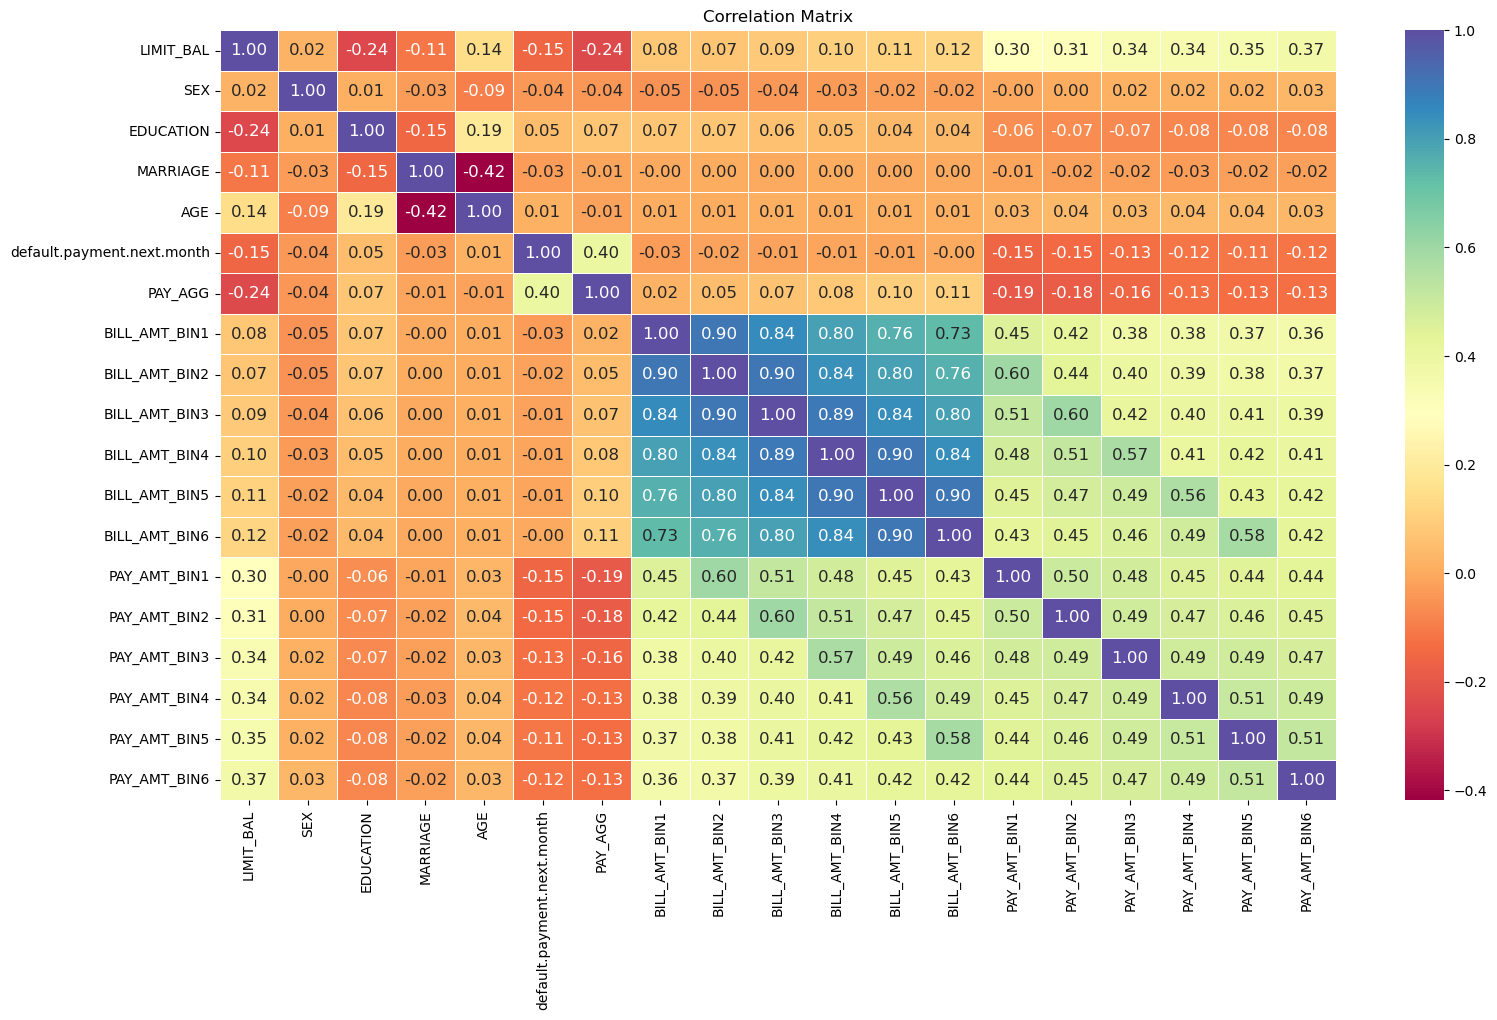

In [43]:
# Correlation summary
plt.figure(figsize=(18, 10))
sns.heatmap(df_raw.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5,annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()

In [44]:
df_raw.corr()['default.payment.next.month'].sort_values(ascending=False)

default.payment.next.month    1.000000
PAY_AGG                       0.399075
EDUCATION                     0.049087
AGE                           0.014424
BILL_AMT_BIN6                -0.002558
BILL_AMT_BIN5                -0.008630
BILL_AMT_BIN4                -0.009613
BILL_AMT_BIN3                -0.014309
BILL_AMT_BIN2                -0.015866
BILL_AMT_BIN1                -0.026189
MARRIAGE                     -0.026903
SEX                          -0.039815
PAY_AMT_BIN5                 -0.112739
PAY_AMT_BIN6                 -0.117082
PAY_AMT_BIN4                 -0.118474
PAY_AMT_BIN3                 -0.129852
PAY_AMT_BIN2                 -0.146541
PAY_AMT_BIN1                 -0.153760
LIMIT_BAL                    -0.154357
Name: default.payment.next.month, dtype: float64

In [45]:
df_raw.corr()['BILL_AMT_BIN1'].sort_values(ascending=False)

BILL_AMT_BIN1                 1.000000
BILL_AMT_BIN2                 0.900268
BILL_AMT_BIN3                 0.844886
BILL_AMT_BIN4                 0.796160
BILL_AMT_BIN5                 0.760623
BILL_AMT_BIN6                 0.729182
PAY_AMT_BIN1                  0.452762
PAY_AMT_BIN2                  0.423027
PAY_AMT_BIN3                  0.382669
PAY_AMT_BIN4                  0.376264
PAY_AMT_BIN5                  0.370238
PAY_AMT_BIN6                  0.358741
LIMIT_BAL                     0.078899
EDUCATION                     0.069497
PAY_AGG                       0.020523
AGE                           0.007965
MARRIAGE                     -0.000637
default.payment.next.month   -0.026189
SEX                          -0.047254
Name: BILL_AMT_BIN1, dtype: float64

In [46]:
df_raw.corr()['PAY_AMT_BIN1'].sort_values(ascending=False)

PAY_AMT_BIN1                  1.000000
BILL_AMT_BIN2                 0.598945
BILL_AMT_BIN3                 0.514849
PAY_AMT_BIN2                  0.496433
PAY_AMT_BIN3                  0.484375
BILL_AMT_BIN4                 0.479373
BILL_AMT_BIN1                 0.452762
PAY_AMT_BIN4                  0.452603
BILL_AMT_BIN5                 0.450974
PAY_AMT_BIN5                  0.444793
PAY_AMT_BIN6                  0.437909
BILL_AMT_BIN6                 0.426109
LIMIT_BAL                     0.295788
AGE                           0.028462
SEX                          -0.003957
MARRIAGE                     -0.008861
EDUCATION                    -0.059428
default.payment.next.month   -0.153760
PAY_AGG                      -0.194406
Name: PAY_AMT_BIN1, dtype: float64

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def compute_vif(considered_features):

    X = df_raw[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [49]:
# Look at VIF for all the numeric
considered_features = df_raw.columns

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
9,BILL_AMT_BIN3,11.642692
8,BILL_AMT_BIN2,11.568319
10,BILL_AMT_BIN4,11.359398
11,BILL_AMT_BIN5,11.305040
12,BILL_AMT_BIN6,7.726229
7,BILL_AMT_BIN1,6.132841
14,PAY_AMT_BIN2,2.467828
13,PAY_AMT_BIN1,2.438787
17,PAY_AMT_BIN5,2.429227
15,PAY_AMT_BIN3,2.424996


<Font color = 'blue'>From above, we see that BILL_AMT and PAY_AMT are highly correlated to same features of other months. Hence we will drop those features.

In [50]:
df_raw = df_raw.drop(
    ['BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6',
    'PAY_AMT_BIN2','PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6',],axis=1)

In [51]:
# Look at VIF for all the numeric
considered_features = df_raw.columns

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
8,PAY_AMT_BIN1,1.423647
7,BILL_AMT_BIN1,1.295086
4,AGE,1.285969
0,LIMIT_BAL,1.263801
6,PAY_AGG,1.263710
3,MARRIAGE,1.235756
5,default.payment.next.month,1.202995
2,EDUCATION,1.147911
1,SEX,1.021659


In [52]:
df_raw.shape

(29601, 9)

In [53]:
df_raw

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month,PAY_AGG,BILL_AMT_BIN1,PAY_AMT_BIN1
0,20000.0,2,2,1,24,1,2,3,1
1,120000.0,2,2,2,26,1,2,2,1
2,90000.0,2,2,2,34,0,0,4,2
3,50000.0,2,2,1,37,0,0,5,2
4,50000.0,1,2,1,57,0,0,3,2
...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,7,5
29996,150000.0,1,3,2,43,0,0,2,2
29997,30000.0,1,2,2,37,1,3,3,1
29998,80000.0,1,3,1,41,1,1,1,7


In [54]:
#Converting category labels with one hot encoding
df_raw = pd.get_dummies(df_raw, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)

In [55]:
df_raw.shape

(29601, 15)

In [56]:
df_raw

,LIMIT_BAL,AGE,default.payment.next.month,PAY_AGG,BILL_AMT_BIN1,PAY_AMT_BIN1,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,1,2,3,1,0,1,0,1,0,0,1,0,0
1,120000.0,26,1,2,2,1,0,1,0,1,0,0,0,1,0
2,90000.0,34,0,0,4,2,0,1,0,1,0,0,0,1,0
3,50000.0,37,0,0,5,2,0,1,0,1,0,0,1,0,0
4,50000.0,57,0,0,3,2,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,7,5,1,0,0,0,1,0,1,0,0
29996,150000.0,43,0,0,2,2,1,0,0,0,1,0,0,1,0
29997,30000.0,37,1,3,3,1,1,0,0,1,0,0,0,1,0
29998,80000.0,41,1,1,1,7,1,0,0,0,1,0,1,0,0


In [57]:
#saving cleaned dataset for model building
df_raw.to_csv('df_raw_cleaned.csv', index=False) 

<font color = 'blue'>**Summary** <br>1. This dataset has total 30000 records (rows), 25 variables (columns). All variables are in numerical format (integer or float).<br>2. There is no missing value.<br>3. Feature engineering: 'PAY_AGG' is created as a more reliable and useful measure.<br>4. As the number of months the customer has delayed payment increases, the number of customer that default payment next month compared to no default payment increases.<br>5. BILL_AMT and PAY_AMY are very much skewed to the high amount so they are categorized for better distribution profile.<br>6. The amount in the bill statement for every month has same distribution.<br>7. Tthe distribution of amount paid in Sept, Aug, Jul is different from Jun, May, Apr, showing customers tend to make smaller payment in Jun, May, Apr. This could be due to Jun, May, Apr are holiday and shopping season, and customers have less cash to make payment. This observation is further supported by higher mean and median amount in the bill statement in Jun, May, and Apr as customers are spending more<br>8. No linear relationship is found between Amount to the statement to default payment next month.<br>9. Customers tend to default payment in next month when they make smaller payment.<br>10. Generally customers tend to default next month payment when they are less than 30 years old and when their age increases.<br>11. Statistical chi-square test shows that SEX, EDUCATION and MARRIAGE are correlated to target variable.<br>12. More male default payment compared to female. Customers having education of others is least likely to default payment, followed by graduate school, university, and lastly high school. Customers that are single are less likely default payment compared to married and others.<br>13. BILL_AMT and PAY_AMT are highly correlated to the same feature of different months so they should not be used in building the model..

# 4. Task 2

### Task 2.1: Import, describe and manipulate train data

In [2]:
df_train = pd.read_csv('Train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         26000 non-null  int64  
 1   LIMIT_BAL  26000 non-null  int64  
 2   SEX        26000 non-null  int64  
 3   EDUCATION  26000 non-null  int64  
 4   MARRIAGE   26000 non-null  int64  
 5   AGE        26000 non-null  int64  
 6   PAY_0      26000 non-null  int64  
 7   PAY_2      26000 non-null  int64  
 8   PAY_3      26000 non-null  int64  
 9   PAY_4      26000 non-null  int64  
 10  PAY_5      26000 non-null  int64  
 11  PAY_6      26000 non-null  int64  
 12  BILL_AMT1  26000 non-null  int64  
 13  BILL_AMT2  26000 non-null  float64
 14  BILL_AMT3  26000 non-null  float64
 15  BILL_AMT4  26000 non-null  float64
 16  BILL_AMT5  26000 non-null  float64
 17  BILL_AMT6  26000 non-null  float64
 18  PAY_AMT1   26000 non-null  float64
 19  PAY_AMT2   26000 non-null  float64
 20  PAY_AM

In [4]:
df_train.shape

(26000, 25)

In [5]:
df_train.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


<font color = 'blue'>There are 26000 records, 25 variables including 1 target variable.

In [6]:
#Applying same data preparation as df_raw
df_backup_train = df_train.copy()

df_train.iloc[:,6:12] = df_train.iloc[:,6:12].map(lambda x: 1 if x > 0 else 0)
df_train['PAY_AGG'] = df_train.iloc[:,6:12].sum(axis=1)

bins = [-400000,0, 3000, 15000, 45000, 90000, 150000, 270000, 1800000]
labels = ['1','2','3','4','5','6','7','8']
new_columns =['BILL_AMT_BIN1','BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6']
for col, new_col in zip(df_train.columns[12:18], new_columns):
    df_train[new_col]=pd.cut(df_train[col], bins = bins, labels = labels)

bins = [-1,1000,2000,4000,8000,16000,32000,90000,1800000]
labels = ['1','2','3','4','5','6','7','8']
new_columns =['PAY_AMT_BIN1','PAY_AMT_BIN2','PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6']

for col, new_col in zip(df_train.columns[18:24], new_columns):
    df_train[new_col]=pd.cut(df_train[col], bins = bins, labels = labels)

df_train = df_train.apply(lambda x: pd.to_numeric(x, errors = 'ignore') if x.dtype.name == 'category' else x)

df_train['EDUCATION'] = df_train['EDUCATION'].replace([6,0],5)
df_train = df_train[df_train['EDUCATION']!=5]
df_train = df_train[df_train['MARRIAGE']!=0]

df_train = df_train.drop(
    ['ID','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)

df_train = df_train.drop(
    ['BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6',
    'PAY_AMT_BIN2','PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6',],axis=1)

df_train = pd.get_dummies(df_train, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)

df_train.to_csv('df_train_cleaned.csv', index=False)

### Task 2.2: Perform logistic regression

In [7]:
df_train_cleaned = pd.read_csv('df_train_cleaned.csv')

In [8]:
df_train_cleaned.shape

(25648, 15)

In [9]:
df_train

,LIMIT_BAL,AGE,Default,PAY_AGG,BILL_AMT_BIN1,PAY_AMT_BIN1,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,120000,26,1,2,2,1,0,1,0,1,0,0,0,1,0
1,50000,37,0,0,5,2,0,1,0,1,0,0,1,0,0
2,50000,57,0,0,3,2,1,0,0,1,0,0,1,0,0
3,50000,37,0,0,5,3,1,0,1,0,0,0,0,1,0
4,500000,29,0,0,8,7,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,150000,43,0,0,2,2,1,0,0,0,1,0,0,1,0
25996,30000,37,1,3,3,1,1,0,0,1,0,0,0,1,0
25997,80000,41,1,1,1,7,1,0,0,0,1,0,1,0,0
25998,50000,46,1,0,5,3,1,0,0,1,0,0,1,0,0


In [10]:
X_train = df_train_cleaned.drop('Default', axis=1)
y_train = df_train_cleaned['Default']

In [11]:
print(X_train.shape)
print(y_train.shape)

(25648, 14)
(25648,)


In [12]:
SEED = 42

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [14]:
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
#X_train_resampled.shape

In [16]:
scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
#X_train = scaler.fit_transform(X_train)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_baseline = LogisticRegression(class_weight='balanced')

In [19]:
lr_baseline.fit(X_train_resampled, y_train_resampled)
#lr_baseline.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### Task 2.3: Identify variables that would cause multicollinearity

<font color='blue'>Please note variables that would cause multilinearity have already been identified and transformed or removed in data preprocessing. Please refer task 1.3 and 1.4. These variables are 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6''BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6','PAY_AMT_BIN2', 'PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6'

### Task 2.4: Import, describe, and manipulate test data

In [20]:
df_test = pd.read_csv('Test.csv')

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4000 non-null   int64  
 1   LIMIT_BAL  4000 non-null   int64  
 2   SEX        4000 non-null   int64  
 3   EDUCATION  4000 non-null   int64  
 4   MARRIAGE   4000 non-null   int64  
 5   AGE        4000 non-null   int64  
 6   PAY_0      4000 non-null   int64  
 7   PAY_2      4000 non-null   int64  
 8   PAY_3      4000 non-null   int64  
 9   PAY_4      4000 non-null   int64  
 10  PAY_5      4000 non-null   int64  
 11  PAY_6      4000 non-null   int64  
 12  BILL_AMT1  4000 non-null   float64
 13  BILL_AMT2  4000 non-null   int64  
 14  BILL_AMT3  4000 non-null   int64  
 15  BILL_AMT4  4000 non-null   int64  
 16  BILL_AMT5  4000 non-null   float64
 17  BILL_AMT6  4000 non-null   int64  
 18  PAY_AMT1   4000 non-null   int64  
 19  PAY_AMT2   4000 non-null   float64
 20  PAY_AMT3

In [22]:
df_test.shape

(4000, 25)

In [23]:
df_test.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,5170,140000,2,2,2,26,0,0,2,0,...,125046,46364.0,83460,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,22727,90000,2,1,2,31,1,-2,-2,-2,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,4884,150000,2,1,2,32,2,2,2,0,...,123954,131543.0,134319,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,7142,30000,2,2,2,21,-2,-2,-2,-2,...,4311,1551.0,0,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,19043,70000,2,2,2,23,2,2,2,0,...,18013,19315.0,19859,2850,0.0,1400.0,1600.0,1000.0,0.0,1


<font color = 'blue'>There are 4000 records, 25 variables including 1 target variable.

In [24]:
#Applying same data preparation as df_raw
df_backup_test = df_test.copy()

df_test.iloc[:,6:12] = df_test.iloc[:,6:12].map(lambda x: 1 if x > 0 else 0)
df_test['PAY_AGG'] = df_test.iloc[:,6:12].sum(axis=1)

bins = [-400000,0, 3000, 15000, 45000, 90000, 150000, 270000, 1800000]
labels = ['1','2','3','4','5','6','7','8']
new_columns =['BILL_AMT_BIN1','BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6']
for col, new_col in zip(df_test.columns[12:18], new_columns):
    df_test[new_col]=pd.cut(df_test[col], bins = bins, labels = labels)

bins = [-1,1000,2000,4000,8000,16000,32000,90000,1800000]
labels = ['1','2','3','4','5','6','7','8']
new_columns =['PAY_AMT_BIN1','PAY_AMT_BIN2','PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6']

for col, new_col in zip(df_test.columns[18:24], new_columns):
    df_test[new_col]=pd.cut(df_test[col], bins = bins, labels = labels)

df_test = df_test.apply(lambda x: pd.to_numeric(x, errors = 'ignore') if x.dtype.name == 'category' else x)

df_test['EDUCATION'] = df_test['EDUCATION'].replace([6,0],5)
df_test = df_test[df_test['EDUCATION']!=5]
df_test = df_test[df_test['MARRIAGE']!=0]

df_test = df_test.drop(
    ['ID','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)

df_test = df_test.drop(
    ['BILL_AMT_BIN2','BILL_AMT_BIN3','BILL_AMT_BIN4','BILL_AMT_BIN5','BILL_AMT_BIN6',
    'PAY_AMT_BIN2','PAY_AMT_BIN3','PAY_AMT_BIN4','PAY_AMT_BIN5','PAY_AMT_BIN6',],axis=1)

df_test = pd.get_dummies(df_test, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)

df_test.to_csv('df_test_cleaned.csv', index=False)

### Task 2.5: Create a confusion matrix

In [25]:
df_test_cleaned = pd.read_csv('df_test_cleaned.csv')

In [26]:
df_test_cleaned.shape

(3953, 15)

In [27]:
X_test = df_test_cleaned.drop('Default', axis=1)
y_test = df_test_cleaned['Default']

In [28]:
print(X_test.shape)
print(y_test.shape)

(3953, 14)
(3953,)


In [29]:
X_test = scaler.fit_transform(X_test)

In [30]:
print('Training Accuracy: ',lr_baseline.score(X_train_resampled,y_train_resampled), '\nTest Accuracy: ', lr_baseline.score(X_test,y_test))

Training Accuracy:  0.808628651741793 
Test Accuracy:  0.7996458386035922


In [31]:
y_pred = lr_baseline.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
dfConfu = confusion_matrix(y_test, y_pred)

In [34]:
print(dfConfu)

[[2833  241]
 [ 551  328]]


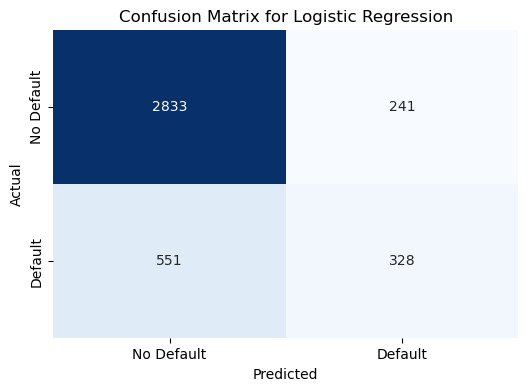

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [36]:
from sklearn.metrics import classification_report

In [37]:
report_lr = classification_report(y_test, y_pred, target_names=['No Default','Default'])
print(report_lr)

              precision    recall  f1-score   support

  No Default       0.84      0.92      0.88      3074
     Default       0.58      0.37      0.45       879

    accuracy                           0.80      3953
   macro avg       0.71      0.65      0.67      3953
weighted avg       0.78      0.80      0.78      3953



### Task 2.6: Report logistic regression results

<font color='blue'>The test accuracy is 76%, weighted average precision is 78%, and weighted average recall is 76%.

<font color='blue'>The logistic regression model is struggling with the minority class ("Default"). The precision for the "Default" class is 0.48, meaning that out of all the instances predicted as "Default," only 48% were actually "Default." The recall for the "Default" class is 0.56, meaning that the model correctly identified 56% of all actual "Default" instances.

### Task 3.1: Create a random forest model

Training Accuracy:  0.7396094769601446 
Test Accuracy:  0.7412092081963066


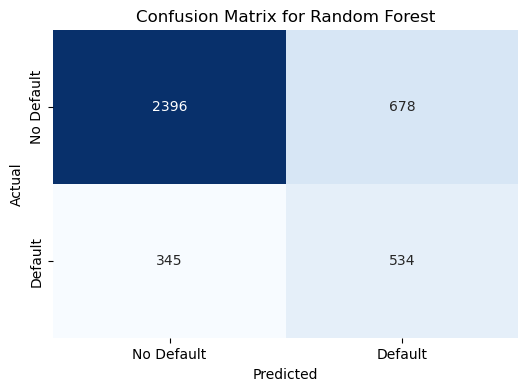

              precision    recall  f1-score   support

  No Default       0.87      0.78      0.82      3074
     Default       0.44      0.61      0.51       879

    accuracy                           0.74      3953
   macro avg       0.66      0.69      0.67      3953
weighted avg       0.78      0.74      0.75      3953



In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED, n_estimators=1500, max_depth=3,max_features=3)
rf.fit(X_train_resampled,y_train_resampled)
#rf.fit(X_train,y_train)
print('Training Accuracy: ',rf.score(X_train_resampled,y_train_resampled), '\nTest Accuracy: ', rf.score(X_test,y_test))
#print('Training Accuracy: ',rf.score(X_train,y_train), '\nTest Accuracy: ', rf.score(X_test,y_test))
y_pred = rf.predict(X_test)
dfConfu = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

report_rf = classification_report(y_test, y_pred, target_names=['No Default','Default'])
print(report_rf)

### Task 3.2: Report random forest results

<font color='blue'>The test accuracy is 78%, weighted average precision is 74%, and weighted average recall is 78%.

<font color='blue'>The random forest model is struggling with the minority class ("Default"). The precision for the "Default" class is 0.58, meaning that out of all the instances predicted as "Default," only 58% were actually "Default." The recall for the "Default" class is 0.10, meaning that the model correctly identified 10% of all actual "Default" instances.

### Task 4.1: Fit support vector machine (SVM) algorithms

Training Accuracy:  0.8076247364722418 
Test Accuracy:  0.7991398937515811


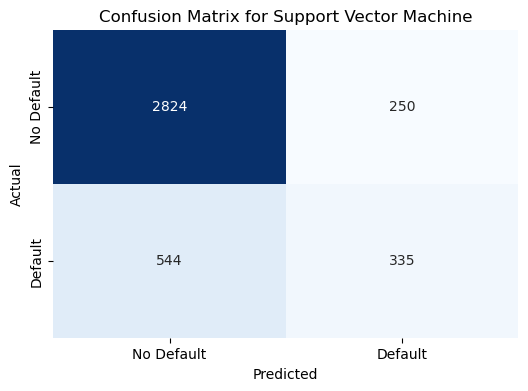

              precision    recall  f1-score   support

  No Default       0.84      0.92      0.88      3074
     Default       0.57      0.38      0.46       879

    accuracy                           0.80      3953
   macro avg       0.71      0.65      0.67      3953
weighted avg       0.78      0.80      0.78      3953



In [39]:
from sklearn.svm import SVC
svc = SVC(random_state=SEED, gamma=0.025, C=3)
svc.fit(X_train_resampled,y_train_resampled)
#svc.fit(X_train,y_train)
print('Training Accuracy: ',svc.score(X_train_resampled,y_train_resampled), '\nTest Accuracy: ', svc.score(X_test,y_test))
#print('Training Accuracy: ',svc.score(X_train,y_train), '\nTest Accuracy: ', svc.score(X_test,y_test))
y_pred = svc.predict(X_test)
dfConfu = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

report_svc = classification_report(y_test, y_pred, target_names=['No Default','Default'])
print(report_svc)

### Task 4.2: Report SVM results

<font color='blue'>The test accuracy is 80%, weighted average precision is 78%, and weighted average recall is 80%.

<font color='blue'>The SVM model is struggling with the minority class ("Default"). The precision for the "Default" class is 0.57, meaning that out of all the instances predicted as "Default," only 57% were actually "Default." The recall for the "Default" class is 0.38, meaning that the model correctly identified 38% of all actual "Default" instances.

### Task 5.1: Fit an ANN model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()

model.add(Dense(16, input_dim=X_train_resampled.shape[1], activation='relu'))

model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid')) #binary classification last activation is sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [42]:
#early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

### Task 5.2: Set parameters for an ANN model

In [43]:
#model.fit(x=X_train_resampled,y=y_train_resampled, epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop], batch_size=15)
model.fit(x=X_train_resampled,y=y_train_resampled, epochs=100,validation_data=(X_test,y_test), batch_size=15)

Epoch 1/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.5177 - val_loss: 0.4789
Epoch 2/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4057 - val_loss: 0.4642
Epoch 3/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4025 - val_loss: 0.5394
Epoch 4/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4003 - val_loss: 0.5368
Epoch 5/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.3995 - val_loss: 0.4673
Epoch 6/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.4000 - val_loss: 0.4751
Epoch 7/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3945 - val_loss: 0.4660
Epoch 8/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3961 - val_loss: 0.4732
Epoch 9/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3943 - val_loss: 0.4638
Epoch 10/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3926 - val_loss: 0.4655
Epoch 11/100
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3936 - val_loss: 0.4920
Epoch 12/100

In [44]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

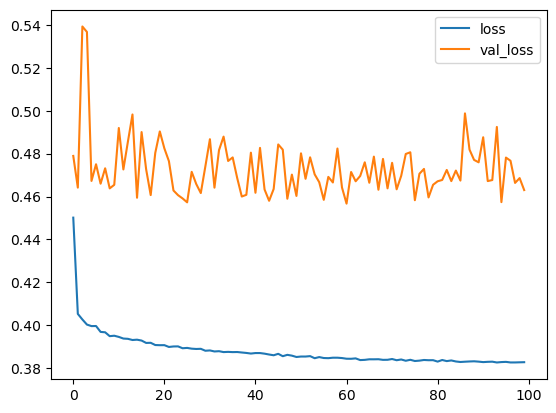

In [45]:
model_loss.plot()

### Task 5.3: Report ANN results

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


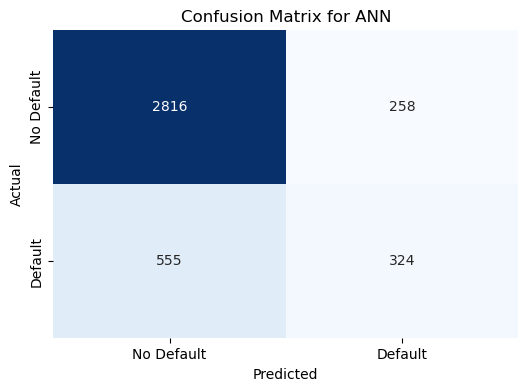

              precision    recall  f1-score   support

  No Default       0.84      0.92      0.87      3074
     Default       0.56      0.37      0.44       879

    accuracy                           0.79      3953
   macro avg       0.70      0.64      0.66      3953
weighted avg       0.77      0.79      0.78      3953



In [46]:
#test_loss, test_accuracy = model.evaluate(X_test, y_test)
#print(f'Test Accuracy: {test_accuracy}')
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1,0)
dfConfu = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN')
plt.show()

report_model = classification_report(y_test, y_pred, target_names=['No Default','Default'])
print(report_model)

### Task 6: Compare machine learning models

To decide which model to use based on evaluation metrics on the test dataset, we compare the common metrics across the models created: logistic regression, random forest, SVM, and ANN. The key evaluation metrics include accuracy, precision, recall, F1-score.

### 1. Logistic Regression

- **Strengths:** 
  - Simplicity and interpretability.
  - Performs well with linearly separable data.
  - Provides probabilities for class predictions.
- **Weaknesses:**
  - Limited in capturing complex relationships in data.
  - May not perform well with non-linear data.

### 2. Random Forest

- **Strengths:**
  - Robust to overfitting due to averaging multiple decision trees.
  - Can capture non-linear relationships and interactions between features.
  - Handles missing values and categorical variables well.
- **Weaknesses:**
  - Less interpretable compared to logistic regression.
  - More computationally intensive.

### 3. SVM (Support Vector Machine)

- **Strengths:**
  - Effective in high-dimensional spaces.
  - Robust to overfitting, especially in high-dimensional space.
- **Weaknesses:**
  - Can be computationally expensive, especially with large datasets.
  - Requires careful tuning of hyperparameters (e.g., kernel, C, gamma).

### 4. ANN (Artificial Neural Network)

- **Strengths:**
  - Capable of capturing complex relationships and patterns in data.
  - Flexible architecture to fit various types of data.
- **Weaknesses:**
  - Requires large amounts of data and computational power.
  - Longer training times and more complex hyperparameter tuning.
  - Less interpretable compared to simpler models.

### Model Evaluation Metrics

To choose the best model, we need to compare the evaluation metrics. Below is the summary of the evaluation metrics on the test dataset for each model:

| Model              | Accuracy | Precision (Default) | Recall (Default) | F1-Score (Default) |
|--------------------|----------|---------------------|------------------|--------------------|
| Logistic Regression| 0.80     | 0.58                | 0.37             | 0.45               |
| Random Forest      | 0.74     | 0.44                | 0.61             | 0.51               |
| SVM                | 0.80     | 0.57                | 0.38             | 0.46               |
| ANN                | 0.79     | 0.56                | 0.37             | 0.44               |

### Decision Criteria

1. **Accuracy:** Overall correctness of the model.
2. **Precision:** For the "Default" class, the ratio of true positive predictions to all positive predictions. Important when the cost of false positives is high.
3. **Recall:** For the "Default" class, the ratio of true positive predictions to all actual positives. Important when the cost of false negatives is high.
4. **F1-Score:** Harmonic mean of precision and recall, providing a single metric that balances both.

### Conclusion

Based on the hypothetical metrics above:

- **Accuracy and F1-Score:** The Random Forest model has the lowest accuracy (0.74) and highest F1-score (0.51), indicating even though overall correctness of the model is slightly lower, it has better mean of precision and recall.

- **Precision and Recall:** The Random Forest model has lowest precision (0.44) but almost two times higher recall (0.61) for the "Default" class compared to other model, suggesting it is best at correctly identifying defaults from actual defaults. A higher rate of false negatives is acceptable in this case as the actions based on the prediction (e.g. sending payment reminder to customer) is not likely to cause costly consequences.

### Recommended Model

**Random Forest:** Given a much better recall and comparably similat accuracy, precision as well as f1 score, the Random Forest model appears to be the best choice among the options to achieve the objective of the model.

Besides that, Ramdom Forest requires less computational power and is more interpretable than other models. Its superior performance on the specific key metrics justifies its use in this context.